# Goals of the Laboratory
In this introductory laboratory:

1. Acquire basic knowledge about Python and Matplotlib
2. Gain familiarity with Juypter Notebooks
3. Gain familiarity with the PySpark API

To achieve such goals, we will go through the following steps:

1. In section 1, **IPython** and **Jupyter Notebooks** are introduced to help students understand the environment used to work on projects, including those that are part of the CLOUDS course.

2. In section 2, we briefly overview **Python** and its syntax. In addition, we cover **Matplotlib**, a very powerful library to plot figures in Python. Finally, we introduce **Pandas**, a python library that is very helpful when manipulating data.

3. In section 3 we cover the **PySpark** APIs

# 2. Python + Pandas + Matplotlib: A great environment for Data Science

This section aims to help students gain a basic understanding of the python programming language and some of its libraries, including `Pandas` or `Matplotlib`. 

When working with a small dataset (one that can comfortably fit into a single machine), Pandas and Matplotlib, together with Python are valid alternatives to other popular tools such as R and Matlab. Using such libraries allows to inherit from the simple and clear Python syntax, achieve very good performance, enjoy superior memory management,  error handling, and good package management \[[1](http://ajminich.com/2013/06/22/9-reasons-to-switch-from-matlab-to-python/)\].


## 2.1. Python

### Question 1
#### Question 1.1
<div class="alert alert-info">
Write a function `checkSquareNumber` to check if a integer number is a square number or not. For example, 16 and 9 are square numbers. 15 isn't square number.
Requirements:

- Input: an integer number

- Output: `True` or `False`

HINT: If the square root of a number is an integer number, it is a square number.
</div>

In [3]:
import math
def checkSquareNumber(x):
    # calculate the square root of x
    root=math.sqrt(x)
    # return True if square root is integer, 
    if root%1==0 :
        return True
    # otherwise, return False
    return False

print(checkSquareNumber(16))
print(checkSquareNumber(250))

True
False


#### Question 1.2
<div class="alert alert-info">
A list `list_numbers` which contains the numbers from 1 to 9999 can be constructed from: 

```python
list_numbers = range(0, 10000)
```

Extract the square numbers in `list_numbers` using function `checkSquareNumber` from question 1.1. How many elements in the extracted list ?
</div>

In [4]:
list_numbers = range(0,10000)
square_numbers = list(filter(lambda x: checkSquareNumber(x), list_numbers))
print(square_numbers)
print(len(square_numbers))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
100


#### Question 1.3
<div class="alert alert-info">
Using array slicing, select the elements of the list square_numbers, whose index is from 5 to 20 (zero-based index).
</div>

In [6]:
print(square_numbers[5:20])

[25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


## 2.2. Numpy
Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.
### 2.2.1. Array
A numpy array is a grid of values, all of **the same type**, and is indexed by a tuple of nonnegative integers. Thanks to the same type property, Numpy has the benefits of [locality of reference](https://en.wikipedia.org/wiki/Locality_of_reference). Besides, many other Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. So, the speed of Numpy is often faster than using built-in datastructure of Python. When working with massive data with computationally expensive tasks, you should consider to use Numpy. 

The number of dimensions is the `rank` of the array; the `shape` of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [7]:
import numpy as np

# Create a rank 1 array
rank1_array = np.array([1, 2, 3])
print("type of rank1_array:", type(rank1_array))
print("shape of rank1_array:", rank1_array.shape)
print("elements in rank1_array:", rank1_array[0], rank1_array[1], rank1_array[2])

# Create a rank 2 array
rank2_array = np.array([[1,2,3],[4,5,6]])
print("shape of rank2_array:", rank2_array.shape)
print(rank2_array[0, 0], rank2_array[0, 1], rank2_array[1, 0])

type of rank1_array: <class 'numpy.ndarray'>
shape of rank1_array: (3,)
elements in rank1_array: 1 2 3
shape of rank2_array: (2, 3)
1 2 4


### 2.2.2. Array slicing
Similar to Python lists, numpy arrays can be sliced. The different thing is that you must specify a slice for each dimension of the array because arrays may be multidimensional.

In [10]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = m_array[:2, 1:3]
print(b)

# we can only use this syntax with numpy array, not python list
print("value at row 0, column 1:", m_array[0, 1])

# Rank 1 view of the second row of m_array  
print("the second row of m_array:", m_array[1, :])

# print element at position (0,2) and (1,3)
print(m_array[[0,1], [2,3]])

[[2 3]
 [6 7]]
value at row 0, column 1: 2
the second row of m_array: [5 6 7 8]
[3 8]


### 2.2.3. Boolean array indexing
We can use boolean array indexing to check whether each element in the array satisfies a condition or use it to do filtering.

In [11]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Find the elements of a that are bigger than 2
# this returns a numpy array of Booleans of the same
# shape as m_array, where each value of bool_idx tells
# whether that element of a is > 3 or not
bool_idx = (m_array > 3)
print(bool_idx , "\n")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(m_array[bool_idx], "\n")

# We can combine two statements
print(m_array[m_array > 3], "\n")

# select elements with multiple conditions
print(m_array[(m_array > 3) & (m_array % 2 == 0)])

[[False False False  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  6  8 10 12]


### 2.2.4. Datatypes
Remember that the elements in a numpy array have the same type. When constructing arrays, Numpy tries to guess a datatype when you create an array However, we can specify the datatype explicitly via an optional argument.

In [12]:
# let Numpy guess the datatype
x1 = np.array([1, 2])
print(x1.dtype)

# force the datatype be float64
x2 = np.array([1, 2], dtype=np.float64)
print(x2.dtype)

int64
float64


### 2.2.5. Array math
Similar to Matlab or R, in Numpy, basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [14]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
# mathematical function is used as operator
print("x + y =", x + y, "\n")

# mathematical function is used as function
print("np.add(x, y)=", np.add(x, y), "\n")

# Unlike MATLAB, * is elementwise multiplication
# not matrix multiplication
print("x * y =", x * y , "\n")
print("np.multiply(x, y)=", np.multiply(x, y), "\n")
print("x*2=", x*2, "\n")

# to multiply two matrices, we use dot function
print("x.dot(y)=", x.dot(y), "\n")
print("np.dot(x, y)=", np.dot(x, y), "\n")

# Elementwise square root
print("np.sqrt(x)=", np.sqrt(x), "\n")

# transpose the matrix
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v.T)  # Prints "[1 2 3]"

x + y = [[ 6.  8.]
 [10. 12.]] 

np.add(x, y)= [[ 6.  8.]
 [10. 12.]] 

x * y = [[ 5. 12.]
 [21. 32.]] 

np.multiply(x, y)= [[ 5. 12.]
 [21. 32.]] 

x*2= [[2. 4.]
 [6. 8.]] 

x.dot(y)= [[19. 22.]
 [43. 50.]] 

np.dot(x, y)= [[19. 22.]
 [43. 50.]] 

np.sqrt(x)= [[1.         1.41421356]
 [1.73205081 2.        ]] 

[[1. 3.]
 [2. 4.]]
[1 2 3]


### Question 2

Given a 2D array:

```
 1  2  3  4
 5  6  7  8 
 9 10 11 12
13 14 15 16
```


#### Question 2.1
<div class="alert alert-info">
Print the all odd numbers in this array using `Boolean array indexing`.
</div>

In [15]:
array_numbers = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])

print(array_numbers[array_numbers%2!=0])

[ 1  3  5  7  9 11 13 15]


#### Question 2.2
<div class="alert alert-info">
Extract the second row and the third column in this array using `array slicing`.
</div>

In [17]:
print(array_numbers[1, :])
print(array_numbers[:, 2])

[5 6 7 8]
[ 3  7 11 15]


#### Question 2.3
<div class="alert alert-info">
Calculate the sum of diagonal elements.
</div>

In [18]:
sum = 0
for i in range(0, array_numbers.shape[0]):
    sum += array_numbers[i, i]
    
print(sum)

34


#### Question 2.4
<div class="alert alert-info">
Print elementwise multiplication of the first row and the last row using numpy's functions.

Print the inner product of these two rows.
</div>

In [19]:
print(array_numbers[0,:] * array_numbers[array_numbers.shape[0]-1,:])
print(array_numbers[0,:].dot(array_numbers[array_numbers.shape[0]-1,:]))

[13 28 45 64]
150


## 2.3. Matplotlib

As its name indicates, Matplotlib is a plotting library. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. The most important function in matplotlib is `plot`, which allows you to plot 2D data.

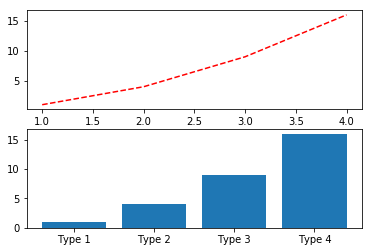

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')

plt.subplot(2, 1, 2)
plt.bar([1, 2, 3, 4], [1, 4, 9, 16], align='center')
# labels of each column bar
x_labels = ["Type 1", "Type 2", "Type 3", "Type 4"]
# assign labels to the plot
plt.xticks([1, 2, 3, 4], x_labels)

plt.show()

###  Question 3
Given a list of numbers from 0 to 9999.


#### Question 3.1
<div class="alert alert-info">
Calculate the histogram of numbers divisible by 3, 7, 11 in the list respectively.

( Or in other words, how many numbers divisible by 3, 7, 11 in the list respectively ?)
</div>

In [22]:
arr = np.array(range(0,10000))
divisors = [3, 7, 11]
histogram = list([arr[arr%divisors[0]==0].shape[0],arr[arr%divisors[1]==0].shape[0],arr[arr%divisors[2]==0].shape[0]])
print(histogram)

[3334, 1429, 910]


#### Question 3.2
<div class="alert alert-info">
Plot the histogram in a line chart.
</div>

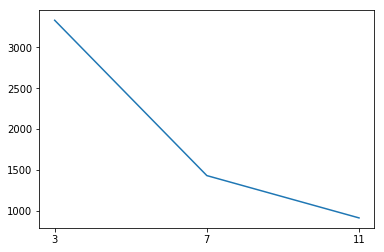

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# simple line chart
plt.plot(histogram)
x_indexes = [0,1,2]
x_names = list(["3","7","11"])
plt.xticks(x_indexes, x_names)
plt.show()

#### Question 3.3
<div class="alert alert-info">
Plot the histogram in a bar chart.
</div>

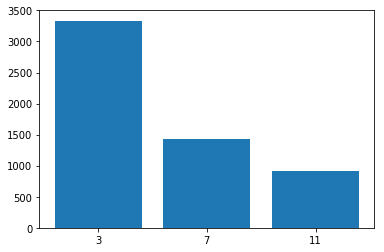

In [24]:
# char chart with x-lables
x_indexes = range(0,3)
x_names = list(["3","7","11"])
plt.bar( x_indexes, histogram, align='center')
plt.xticks(x_indexes, x_names)
plt.show()

## 2.4. Pandas

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Indeed, it is great for data manipulation, data analysis, and data visualization.

### 2.4.1. Data structures
Pandas introduces two useful (and powerful) structures: `Series` and `DataFrame`, both of which are built on top of NumPy.

#### Series
A `Series` is a one-dimensional object similar to an array, list, or even column in a table. It assigns a *labeled index* to each item in the Series. By default, each item will receive an index label from `0` to `N-1`, where `N` is the number items of `Series`.

We can create a Series by passing a list of values, and let pandas create a default integer index.



In [28]:
import pandas as pd
import numpy as np

s = pd.Series({
        'Col1': 3, 'Col2': -10, 
        'Col3': 1.414259, 
        4.1: -65545, 
        5: 8
    })

# get element which has index='Col1'
print("s['Col1']=", s['Col1'], "\n")

# get elements whose index is in a given list
print("s[['Col1', 'Col3', 4.5]]=", s[['Col1', 'Col3'， 4.5]], "\n") #Not existing element 4.5 prints NaN

# use boolean indexing for selection
print(s[s > 0], "\n")

# modify elements on the fly using boolean indexing
s[s > 0] = 15

print(s, "\n")

# mathematical operations can be done using operators and functions.
print(s*10,  "\n")
print(np.square(s), "\n")

s['Col1']= 3.0 

s[['Col1', 'Col3', 4.5]]= Col1    3.000000
Col3    1.414259
dtype: float64 

Col1    3.000000
Col3    1.414259
5       8.000000
dtype: float64 

Col1       15.0
Col2      -10.0
Col3       15.0
4.1    -65545.0
5          15.0
dtype: float64 

Col1       150.0
Col2      -100.0
Col3       150.0
4.1    -655450.0
5          150.0
dtype: float64 

Col1    2.250000e+02
Col2    1.000000e+02
Col3    2.250000e+02
4.1     4.296147e+09
5       2.250000e+02
dtype: float64 



#### DataFrame
A DataFrame is a tabular data structure comprised of rows and columns, akin to database table, or R's data.frame object. In a loose way, we can also think of a DataFrame as a group of Series objects that share an index (the column names).

We can create a DataFrame by passing a dict of objects that can be converted to series-like.

In [30]:
data = {'year': [2013, 2014, 2015, 2013, 2014, 2015, 2013, 2014],
        'team': ['Manchester United', 'Chelsea', 'Asernal', 'Liverpool', 'West Ham', 'Newcastle', 'Machester City', 'Tottenham'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2013,Manchester United,11,5
1,2014,Chelsea,8,8
2,2015,Asernal,10,6
3,2013,Liverpool,15,1
4,2014,West Ham,11,5
5,2015,Newcastle,6,10
6,2013,Machester City,10,6
7,2014,Tottenham,4,12


#### JOIN
An important feature that Pandas supports is `JOIN`. Very often, the data comes from multiple sources, in multiple files. For example, we have 2 CSV files, one contains the information of Artists, the other contains information of Songs. If we want to query the artist name and his/her corresponding songs, we have to do joining two dataframe.

Similar to SQL, in Pandas, you can do inner join, left outer join, right outer join and full outer join. Let's see a small example. Assume that we have two dataset of singers and songs. The relationship between two datasets is maintained by a constrain on `singer_code`.

In [31]:
singers = pd.DataFrame({'singer_code': range(5), 
                           'singer_name': ['singer_a', 'singer_b', 'singer_c', 'singer_d', 'singer_e']})
songs = pd.DataFrame({'singer_code': [2, 2, 3, 4, 5], 
                           'song_name': ['song_f', 'song_g', 'song_h', 'song_i', 'song_j']})
print(singers)
print('\n')
print(songs)

   singer_code singer_name
0            0    singer_a
1            1    singer_b
2            2    singer_c
3            3    singer_d
4            4    singer_e


   singer_code song_name
0            2    song_f
1            2    song_g
2            3    song_h
3            4    song_i
4            5    song_j


In [32]:
# inner join
pd.merge(singers, songs, on='singer_code', how='inner')

,singer_code,singer_name,song_name
0,2,singer_c,song_f
1,2,singer_c,song_g
2,3,singer_d,song_h
3,4,singer_e,song_i


In [33]:
# left join
pd.merge(singers, songs, on='singer_code', how='left')

,singer_code,singer_name,song_name
0,0,singer_a,NaN
1,1,singer_b,NaN
2,2,singer_c,song_f
3,2,singer_c,song_g
4,3,singer_d,song_h
5,4,singer_e,song_i


In [34]:
# right join
pd.merge(singers, songs, on='singer_code', how='right')

,singer_code,singer_name,song_name
0,2,singer_c,song_f
1,2,singer_c,song_g
2,3,singer_d,song_h
3,4,singer_e,song_i
4,5,NaN,song_j


In [35]:
# outer join (full join)
pd.merge(singers, songs, on='singer_code', how='outer')

,singer_code,singer_name,song_name
0,0,singer_a,NaN
1,1,singer_b,NaN
2,2,singer_c,song_f
3,2,singer_c,song_g
4,3,singer_d,song_h
5,4,singer_e,song_i
6,5,NaN,song_j


#### Aggregate data by each group

In [36]:
data = pd.merge(singers, songs, on='singer_code', how='left')

# count the values of each column in group
print(data.groupby('singer_code').count())

print("\n")

# count only song_name
print(data.groupby('singer_code').song_name.count())

print("\n")

# count song name but ignore duplication, and order the result
print(data.groupby('singer_code').song_name.nunique().sort_values(ascending=True))

             singer_name  song_name
singer_code                        
0                      1          0
1                      1          0
2                      2          2
3                      1          1
4                      1          1


singer_code
0    0
1    0
2    2
3    1
4    1
Name: song_name, dtype: int64


singer_code
0    0
1    0
3    1
4    1
2    2
Name: song_name, dtype: int64


### Question 4
We have two datasets about music: [song](https://github.com/michiard/AML-COURSE/blob/master/data/song.tsv) and [album](https://github.com/michiard/AML-COURSE/blob/master/data/album.tsv).

In the following questions, you **have to** use Pandas to load data and write code to answer these questions.


#### Question 4.1
<div class="alert alert-info">
Load both dataset into two dataframes and print the information of each dataframe

**HINT**: 

- You can click button `Raw` on the github page of each dataset and copy the URL of the raw file.
- The dataset can be load by using function `read_table`. For example: `df = pd.read_table(raw_url, sep='\t')`
</div>

In [37]:
import pandas as pd

songdb_url = 'https://raw.githubusercontent.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/master/data/song.tsv'
albumdb_url = 'https://raw.githubusercontent.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/master/data/album.tsv'
song_df = pd.read_table(songdb_url, sep='\t')
album_df = pd.read_table(albumdb_url, sep='\t')

print(song_df,"\n")
print(album_df)

            Singer                  Song  Album Length
0  Michael Jackson                 2 bad    1.0   4:07
1  Michael Jackson           Unbreakable    2.0   6:26
2  Michael Jackson       Don't Walk Away    2.0   4:25
3  Michael Jackson         Break of Dawn    2.0   5:33
4     Taylor Swift          All Too Well    5.0   5:29
5     Taylor Swift             Bad Blood    7.0   3:19
6     Taylor Swift      Back to December    6.0   4:54
7  Michael Jackson          Human Nature    4.0   4:06
8  Michael Jackson          Baby Be Mine    4.0   4:20
9  Michael Jackson  What More Can I Give    NaN   3:36 

   Album code                                 Album name  Year
0           1  HIStory: Past, Present and Future, Book I  1995
1           2                                 Invincible  2001
2           3                                        Bad  1986
3           4                                   Thriller  1982
4           5                                        Red  2012
5           6  

#### Question 4.2
<div class="alert alert-info">
How many albums in this datasets ?

How many songs in this datasets ?
</div>

In [39]:
print("number of albums:", album_df["Album name"].count())
print("number of songs:", song_df["Song"].count())

number of albums: 7
number of songs: 10


#### Question 4.3
<div class="alert alert-info">
How many distinct singers in this dataset ?
</div>

In [41]:
print("number distinct singers:", len(song_df.groupby("Singer")))

number distinct singers: 2


#### Question 4.4
<div class="alert alert-info">
Is there any song that doesn't belong to any album ?

Is there any album that has no song ?

**HINT**: 

- To join two datasets on different key names, we use `left_on=` and `right_on=` instead of `on=`.
- Funtion `notnull` and `isnull` help determining the value of a column is missing or not. For example:
`df['song'].isnull()`.
</div>

In [43]:
fulldf = pd.merge(song_df, album_df, how='outer', left_on='Album', right_on='Album code')

In [44]:
fulldf[fulldf['Song'].notnull() & fulldf['Album'].isnull()]

,Singer,Song,Album,Length,Album code,Album name,Year
9,Michael Jackson,What More Can I Give,NaN,3:36,NaN,NaN,NaN


In [45]:
fulldf[fulldf['Song'].isnull() & fulldf['Album code'].notnull()]

,Singer,Song,Album,Length,Album code,Album name,Year
10,NaN,NaN,NaN,NaN,3.0,Bad,1986.0


#### Question 4.5
<div class="alert alert-info">
How many songs in each albums of Michael Jackson ?
</div>

In [48]:
fulldf[fulldf['Singer']=='Michael Jackson'].groupby("Album").Song.count()

Album
1.0    1
2.0    3
4.0    2
Name: Song, dtype: int64

# 3. PySpark

Spark is an alternative framework to Hadoop MapReduce, designed to make it easier and quicker to build and run distributed data manipulation algorithms. Spark comes with a library for machine learning (MLLib) and graph algorithms, and also supports real-time streaming and SQL syntax, via Spark Streaming and SparkSQL, respectively. Spark exposes the Spark programming model to Java, Scala, or Python. In Python, we use the PySpark API to interact with Spark.

As discussed in the CLOUDS lectures, every Spark application has a Spark driver. It is the program that declares the transformations and actions on RDDs of data and submits such requests to the cluster manager. Actually, the driver is the program that creates the `SparkContext`, connecting to a given cluster manager such as  Spark Master, YARN or others. The executors run user code, run computations and can cache data for your application. The `SparkContext` will create a job that is broken into stages. The stages are broken into tasks which are scheduled by the SparkContext on an executor.

When starting PySpark with command `pyspark` or using a well configured notebook (such as this one), `SparkContext` is created automatically in variable `sc`. 



In [58]:
sc

<SparkContext master=spark://spark-master0-2919-prod2:7077 appName=pyspark-shell>

PySpark uses PySpark RDDs which  are just RDDs of Python objects: like Python lists, they can store objects with mixed types (actually all the objects are instances of `PyObject`).

When PySpark is started, it also starts a JVM, which is accessible through a socket. PySpark uses `Py4J` to handle this communication. The JVM works as the actual Spark driver, and loads a `JavaSparkContext` that communicates with the Spark executors across the cluster. Python API calls to the Spark Context object are then **translated into Java API calls** to the JavaSparkContext. For example, the implementation of PySpark's `sc.textFile()` dispatches a call to the `.textFile` method of the `JavaSparkContext`, which ultimately communicates with the Spark executor JVMs to load the text data from HDFS. 

![](http://i.imgur.com/YlI8AqEl.png)

The Spark executors on the cluster start a Python interpreter for each core, with which they communicate data through a pipe when they need to execute user-code. A Python RDD in the local PySpark client corresponds to a `PythonRDD` object in the local JVM. The data associated with the RDD actually lives in the Spark JVMs as Java objects. For example, running `sc.textFile()` in the Python interpreter will call the `JavaSparkContexts` `textFile` method, which loads the data as Java String objects in the cluster.


When an API call is made on the `PythonRDD`, any associated code (e.g., Python lambda function) **is serialized and distributed to the executors**. The data is then converted from Java objects to a Python-compatible representation (e.g., pickle objects) and streamed to executor-associated Python interpreters through a pipe. Any necessary Python processing is executed in the interpreter, and the resulting data is stored back as an RDD (as pickle objects by default) in the JVMs. 


### Working with HDFS

In [60]:
!hdfs dfs -ls

Found 6 items
-rw-r--r--   3 user14 supergroup     244438 2017-03-29 14:30 airports.csv
-rw-r--r--   3 user14 supergroup      43758 2017-03-29 14:31 carriers.csv
drwxr-xr-x   - user14 supergroup          0 2017-03-22 15:10 lastfm_model.spark
drwxr-xr-x   - user14 supergroup          0 2017-03-22 15:10 lastfm_modelWUA.spark
drwxr-xr-x   - user14 supergroup          0 2017-03-20 15:17 lastfm_modelWithoutUnknowns.spark
-rw-r--r--   3 user14 supergroup     428796 2017-03-29 14:50 plane-data.csv


In [61]:
! hdfs dfs -ls /datasets/gutenberg

Found 2 items
-rw-r--r--   3 root supergroup 3000000000 2016-03-30 08:36 /datasets/gutenberg/gutenberg_small.txt
-rw-r--r--   3 root supergroup   31457280 2017-02-28 13:34 /datasets/gutenberg/gutenberg_tiny.txt


### Question 3.1
<div class="alert alert-info">
Using the hdfs command, inspect the file we've used before, located in /datasets/gutenberg/gutenberg_tiny.txt
</div>

* How many HDFS blocks constitute our file?
    * The file is constituted of just one block. In fact the file is of ~32MB and in a HDFS a typical dimension of a block is bigger than 64MB.

* Where are they located?
* What is the replication factor of our file?
    * The only block is replicated 3 times, as expected, in the locations [10.0.0.5:50010, 10.0.0.11:50010, 10.0.0.14:50010].

In [63]:
!hdfs fsck /datasets/gutenberg/gutenberg_tiny.txt -files -blocks -locations

Connecting to namenode via http://hdfs-namenode.zoe:50070
FSCK started by user14 (auth:SIMPLE) from /10.0.0.25 for path /datasets/gutenberg/gutenberg_tiny.txt at Fri Oct 27 11:54:06 UTC 2017
/datasets/gutenberg/gutenberg_tiny.txt 31457280 bytes, 1 block(s):  OK
0. BP-1699471697-10.0.0.2-1454672112057:blk_1074378409_637598 len=31457280 repl=3 [10.0.0.5:50010, 10.0.0.11:50010, 10.0.0.14:50010]

Status: HEALTHY
 Total size:	31457280 B
 Total dirs:	0
 Total files:	1
 Total symlinks:		0
 Total blocks (validated):	1 (avg. block size 31457280 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	3
 Average block replication:	3.0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Number of data-nodes:		11
 Number of racks:		1
FSCK ended at Fri Oct 27 11:54:06 UTC 2017 in 1 milliseconds


The filesystem under path '/datasets/gutenberg/gutenberg_tiny.txt' is HEALTHY


In [59]:
# each line is stored as an element in 'input_file' - a PythonRDD.
input_file = sc.textFile("/datasets/gutenberg/gutenberg_tiny.txt")
num_lines = input_file.count()
print("The number of lines in the input file is:", num_lines)

The number of lines in the input file is: 745613


### Question 3.2
<div class="alert alert-info">
Using the Apache Spark Web UI, as explained above, answer the following questions:
</div>

* How many tasks were launched?
    * 2 tasks
* What is the duration of each task?
    * 2 seconds each
* How many input bytes where processed by each task? How does this relate to the input file size?
    * Each task processed about half of the file (15 MB and 15.1 MB).
* How many workers in total does your cluster have? How many workers were involved in your "line count" job?
    * Our cluster has 4 workers, but only 2 of them have been involved in the line count job, one for each task.
* Given that we know how many HDFS blocks compose our input file (from Question 3.1), explain the number of tasks your job is broken into.
    * The job is broken in two tasks because the block is broken in two partition, since it uses the default partition setting which equals = 2.

## 3.1. Wordcount example
In the example below, we are interested in the top-10 words in terms of frequency of occurrence. To do so, we use a small text file as an input, and we wish to plot the term frequency of such top-10 words using Matplotlib.

In [65]:
words = (
            # read the text file
            sc.textFile("/datasets/gutenberg/gutenberg_small.txt").repartition(16)
            
            # construct words from lines
            .flatMap(lambda line: line.split())
            
            # map each word to (word, 1)
            .map(lambda x: (x, 1))
    
            # reduce by key: accumulate sum the freq of the same word
            .reduceByKey(lambda freq1, freq2: freq1 + freq2)
            
            # swap (word, freq) to (freq, word)
            .map(lambda x: (x[1], x[0]))
    
            # sort result by key DESC
            .sortByKey(False)
         )

### Question 3.3
<div class="alert alert-info">
Using both the terminal and the Apache Spark Web UI, as explained above, answer the following questions:
</div>

* What is the size of the input file?

In [66]:
!hdfs fsck /datasets/gutenberg/gutenberg_small.txt -files -blocks -locations | grep "Total size"

Connecting to namenode via http://hdfs-namenode.zoe:50070
 Total size:	3000000000 B


* How many blocks the input file is broken into? What is the block size?
    * The blocks size is 134217728 B except for the last block that is smaller: 47209984 B.

In [68]:
!hdfs fsck /datasets/gutenberg/gutenberg_small.txt -files -blocks -locations  | grep "Total blocks"

Connecting to namenode via http://hdfs-namenode.zoe:50070
 Total blocks (validated):	23 (avg. block size 130434782 B)


* How many tasks execute in parallel?
   * 4 tasks are executed in parallel during the first two stages. 3 tasks are executed in parallel during the last stage.
* How many jobs were launched upon the execution of the code above? Why (note that there are no actions!)?
   * 2 Jobs have been launched. Even if the sorting operation is listed among the trasformation, it still fire a job cluster. This is a known behaviour, explained by the fact that the operation depends on a partitioner which samples input RDD to compute partition boundaries.
* What does a **"skipped"** stage mean?
   * It means that the RDD produced by the stage is already cached, as result of previous executions, and thus it can be skipped.
* What is the number of shuffled bytes? How does this compare to the number of input bytes?
   * The number of shuffled bytes between the first two stages is 2.1 GB while the number of shuffled bytes between the last two stages is 369.6 MB. The total number of shuffled bytes is ~2.47 GB with respect to the 2.8 GB of input data. The main reduction in the volume of data happens between the last two stages thanks to the reduceByKey transformation.
* Do you think Spark is doing a good job in balancing the load across the workers? What can go wrong with load balancing?
   * Yes, in fact during all the stages the number of data processed by each worker is almost the same. If the load balance is not good, it may happens that a machine works more than the others that will idle in the meanwhile, wasting resources.

In [11]:
# the top-10 words are collected and sent back to the driver:
top10 = words.take(10)
print(top10)

[(29556020, 'the'), (18043957, 'of'), (14914748, 'and'), (12892052, 'to'), (9779124, 'a'), (8568854, 'in'), (5143447, 'that'), (4824456, 'was'), (4156700, 'I'), (3915358, 'with')]


The action `collect` gathers all elements of the RDD (that reside on multiple machines) to the driver (which is running in a single machine), and cast it as a list.

**ATTENTION** collecting an RDD in the driver can be problematic: indeed, an RDD can be very big in size (this is why they are distributed across several machines in the first place!) and thus it could deplete the RAM available in the machine running the driver!

In [12]:
# collect results from executors to the driver
# results = words.collect()
# If you want to have a look at the results, don't print them all, for otherwise the notebook size will be too big

Recall that there are two kinds of functions in Spark: **transformations** and **actions**. All functions `map`, `flatMap`, `reduceByKey`, `sortByKey` are transformation functions. They are not executed right away when called. Indeed, Spark is lazily evaluated, so nothing gets executed unless the driver invokes actions such as `count`, `take`, `collect`...

RDD transformations allow us to create dependencies between RDDs. Each RDD in the lineage chain (string of dependencies) has a function for calculating its data and has a pointer (dependency) to its parent RDD. Every time we use an RDD, dependencies are computed again from the beginning, which can be costly. Fortunately, we can use the function `cache` to instruct Spark to checkpoint in RAM (but eventually also on disk) a particular RDD.

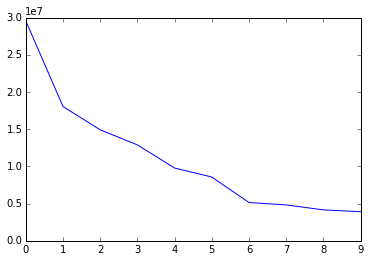

In [13]:
# plot word frequency
%matplotlib inline
import matplotlib.pyplot as plt

# extract the frequencies from the result
frequencies = [x[0] for x in top10]

# plot the frequencies
plt.plot(frequencies)
plt.show()

## 3.2. Night flights example
We have a CSV file which contains the information about flights that took place in the US in 1994.
The data in this file has 29 columns such as `year`, `month`, `day_of_month`, `scheduled_departure_time`,...

In [4]:
#  quick look on the data
! hdfs dfs -cat /datasets/airline/1994.csv | head -n 10

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1994,1,7,5,858,900,954,1003,US,227,NA,56,63,NA,-9,-2,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,8,6,859,900,952,1003,US,227,NA,53,63,NA,-11,-1,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,10,1,935,900,1023,1003,US,227,NA,48,63,NA,20,35,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,11,2,903,900,1131,1003,US,227,NA,148,63,NA,88,3,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,12,3,933,900,1024,1003,US,227,NA,51,63,NA,21,33,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,13,4,NA,900,NA,1003,US,227,NA,NA,63,NA,NA,NA,CLT,ORF,290,NA,NA,1,NA,0,NA,NA,NA,NA,NA
1994,1,14,5,903,900,1005,1003,US,227,NA,62,63,NA,2,3,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,15,6,859,900,1004,1003,US,227,NA,65,

Questions:

- How many night flights do we have in our data ?
- How many night flights per unique carrier ? Plot the top-5 of them, in terms of volume

In [6]:
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
def extract_CRSDepTime_Carier(line):
    cols = line.split(",")
    return (int(cols[5]), cols[8])

header = data.first()

# remove header
data_without_header = data.filter(lambda line: line != header)

# create a new RDD with only scheduled departure time and carrier information
# cache it for later usage
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               .cache()
          )

In [7]:
# select the night flights
night_flights = newdata.filter(lambda f: f[0] > 1800).cache()
night_flights.take(3)

[(2030, 'US'), (2030, 'US'), (2030, 'US')]

In [8]:
# filter and count the night flights
num_night_flights = night_flights.count()
print(num_night_flights)

1078203


We use `groupBy` to cluster flights which belong to the same carrier into a group. In this example, to select the top-5 carriers, we use a method based on the function `takeOrder`. This function takes the top-`k` objects ordered by an index: the trick is that we instruct it to use the cumulative counts as the key.

In [9]:
# group by carrier
night_flights_by_carrier = night_flights.groupBy(lambda x: x[1]).mapValues(lambda flights: len(flights))

# take top 5 carriers
top5_carriers = night_flights_by_carrier.takeOrdered(5, key=lambda x: -x[1])

print(top5_carriers)

[('DL', 208224), ('US', 170397), ('AA', 142832), ('WN', 124024), ('UA', 113640)]


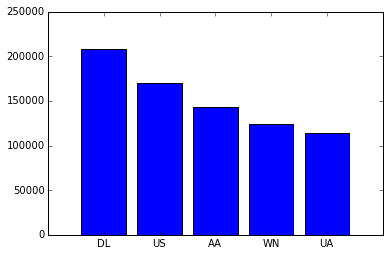

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
num_flights = [ x[1] for x in top5_carriers]

# extract the carriers' names
carrier_names = [x[0] for x in top5_carriers]

# create `virtual indexes for carriers which will be used as x-values`
carrier_indexes = range(0, len(carrier_names))

# plot
plt.bar(carrier_indexes, num_flights, align="center")

# put x-labels for the plot
plt.xticks(carrier_indexes, carrier_names)
plt.show()

## Question 5


### Question 5.1
<div class="alert alert-info">
Compute how many flights have a scheduled departure time later than 09:00 and before 14:00.
</div>

In [7]:
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
def extract_CRSDepTime_Carier(line):
    cols = line.split(",")
    return (int(cols[5]), cols[16])

header = data.first()

# remove header
data_without_header = data.filter(lambda x: x != header)

# create RDD with only scheduled departure time and carrier information
# cache it for later usages
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               .cache()
          )

flights = newdata.filter(lambda x: x[0] > 900 and x[0] < 1400).cache()

print(flights.count())

1625828


### Question 5.2
<div class="alert alert-info">
Compute the cumulative number flights that have a scheduled departure time after 09:00 and before 14:00, for each source airport (origin). Plot the top-5 of such airports.
</div>

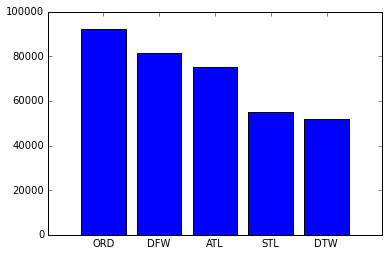

In [8]:
flights_per_carrier = flights.groupBy(lambda x :x[1]).mapValues(lambda x : len(x))

# take top 5 source airports
top5_source_airport = flights_per_carrier.takeOrdered(5, key=lambda x: -x[1])

%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
# This is called list comprehension
num_flights = [ x[1] for x in top5_source_airport]

# create `virtual indexes for carriers which will be used as x-values`
airport_indexes = range(0, len(top5_source_airport))

# plot
plt.bar(airport_indexes, num_flights, align="center")

# extract the carriers' names
airport_names = [ x[0] for x in top5_source_airport]

# put x-labels for the plot
plt.xticks(airport_indexes, airport_names)
plt.show()

# Summary

In this lecture, we gained familiarity with the Jupyter Notebook environment, the Python programming language and its modules. In particular, we covered the Python syntax, Numpy - the core library for scientific computing, Matplotlib - a module to plot graphs, Pandas - a data analysis module. Besides, we started to gain practical experience with PySpark, using, for the moment, small data sets.